In [42]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt

# Load the hand radiograph
im = imageio.imread('E:\ITS_Stuff\Semester 6\pcm_v2\Week_10\hand-xray.JPG')
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())
print('Size:', im.shape)


Data type: uint8
Min. value: 8
Max value: 236
Size: (762, 508, 3)


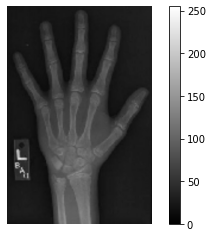

In [43]:
# Plot the grayscale image
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.colorbar();

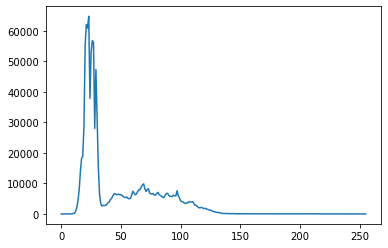

In [44]:
#plot histogram
import scipy.ndimage as ndi
hist = ndi.histogram(im, min=0, max=255, bins=256)
plt.plot(hist)
plt.show()

In [45]:
#RGB
from skimage import io
import matplotlib.pyplot as plt

image = io.imread('E:\ITS_Stuff\Semester 6\pcm_v2\Week_10\Knee_MRI.png')
print('dtype:', image.dtype)
print('shape:', image.shape)


dtype: uint8
shape: (517, 560, 3)


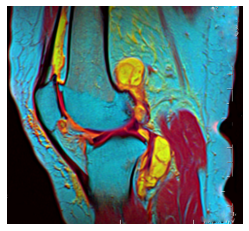

In [46]:
plt.imshow(image)
plt.axis('off')
plt.show()


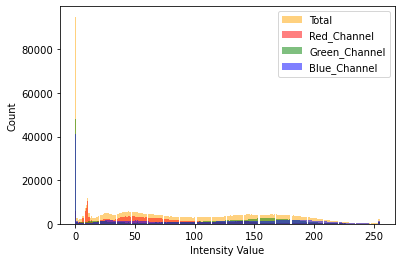

In [47]:
hiscolour = plt.hist(image.ravel(), bins = 256, color = 'orange', alpha = 0.5 )
hiscolour = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
hiscolour = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
hiscolour = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
hiscolour = plt.xlabel('Intensity Value')
hiscolour = plt.ylabel('Count')
hiscolour = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

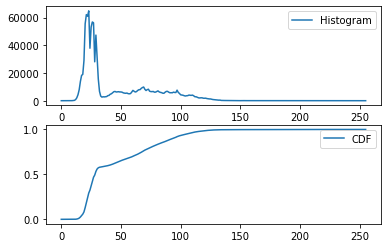

In [48]:
import scipy.ndimage as ndi
hist = ndi.histogram(im, min=0, max=255, bins=256)
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1)

axes[0].plot(hist, label='Histogram')
axes[0].legend()

axes[1].plot(cdf, label='CDF')
axes[1].legend();

### Histogram Equalization

dtype: float64
shape: (762, 508, 3)


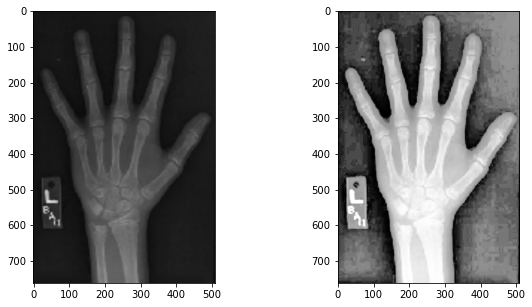

In [49]:
# Histogram Equalization

import numpy as np
import scipy.ndimage as ndi

im_equalized = cdf[im] * 255

print('dtype:', im_equalized.dtype)
print('shape:', im_equalized.shape)

#-------Untuk membenarkan clipping---# astype
im_equalized = im_equalized/np.amax(im_equalized)  #
im_equalized = np.clip(im_equalized, 0, 255)  #

#------Tampilkan-----#
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) #menghasilkan citra horizontal 20 inch dan vertikal 10 inch
axes[0].imshow(im)
axes[1].imshow(im_equalized)

plt.show()

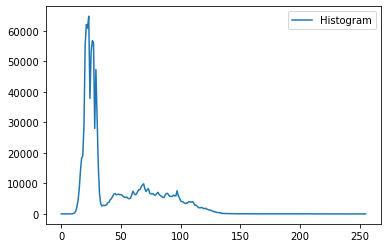

In [50]:
# Plot the histogram and equalization
plt.plot(hist, label='Histogram')
plt.legend()
#axes[1].plot(hist_equalized, label='Histogram')
#axes[1].legend()
plt.show()

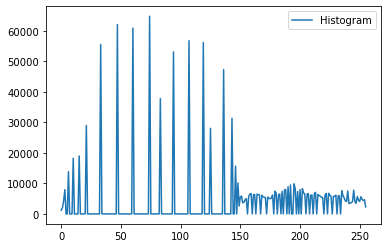

In [51]:
from skimage import img_as_ubyte
im_equalized = img_as_ubyte(im_equalized)
hist_equalized = ndi.histogram(im_equalized, min=0, max=255, bins=256)

plt.plot(hist_equalized, label='Histogram')
plt.legend()

### Adaptive Histogram Equalization

In [52]:
from skimage import exposure

img_adapteq = exposure.equalize_adapthist(im, clip_limit=0.01)

#---- ternyata hasil dari AHE adalah image float64, sehingga harus diconvert ke uint8

from skimage import img_as_ubyte
img_adapteq = img_as_ubyte(img_adapteq)  #convert to uint8

#-------CEK---------
print('Type:', type(img_adapteq))
print('dtype:', img_adapteq.dtype)
print('shape:', img_adapteq.shape)
print('size:', img_adapteq.size)

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (762, 508, 3)
size: 1161288


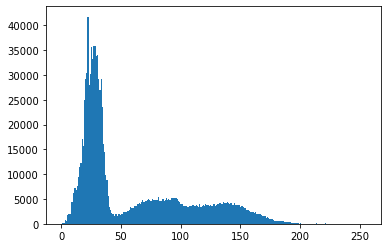

In [53]:
#histogram
import scipy.ndimage as ndi

hist_imm = ndi.histogram(im, min=0, max=255, bins=256)
hist_img_adapteq = ndi.histogram(img_adapteq, min=0, max=255, bins=256)
plt.hist(img_adapteq.ravel(), bins=256, range=[0, 255])
plt.show()

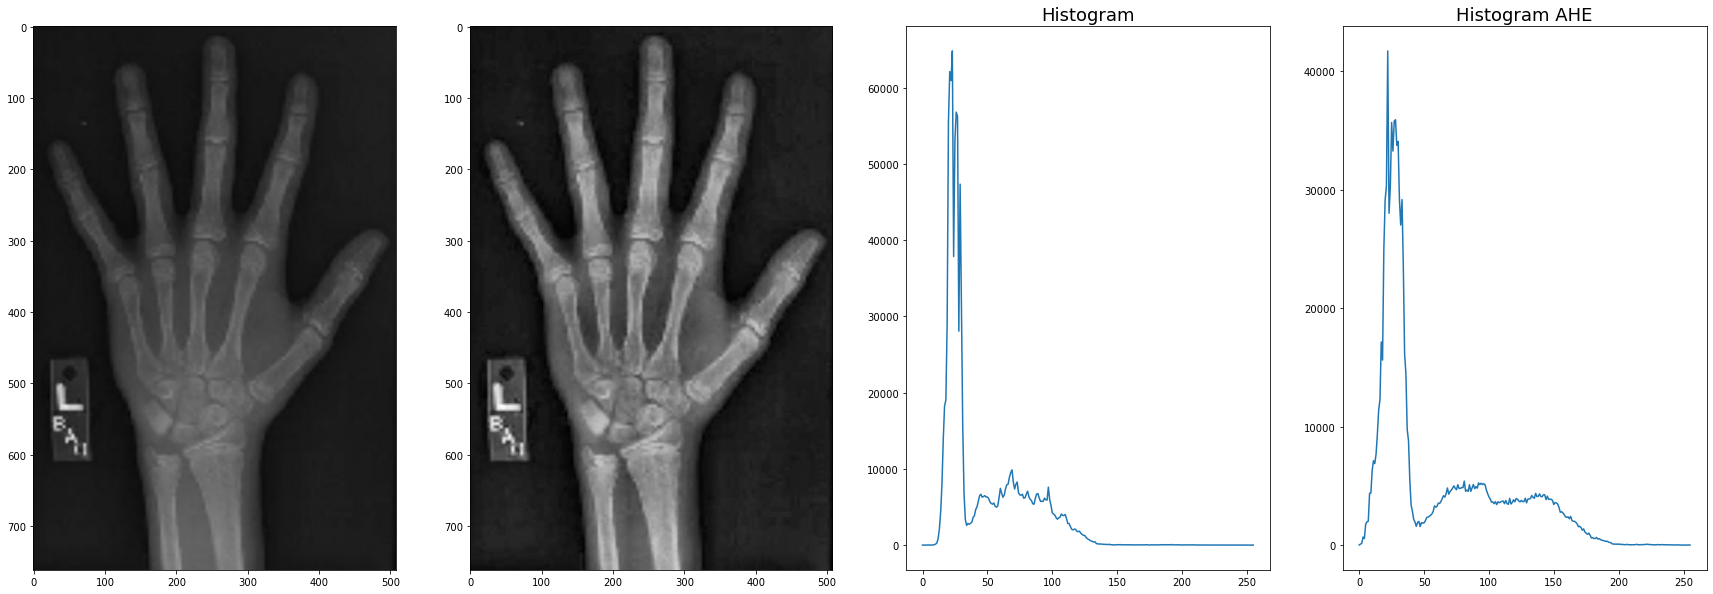

In [54]:
#-------Tampilkan---------#
fig, axes = plt.subplots(1, 4, figsize=(30,10))
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(img_adapteq, cmap='gray')
axes[2].plot(hist_imm)
axes[2].set_title('Histogram', fontsize=18)
axes[3].plot(hist_img_adapteq)
axes[3].set_title('Histogram AHE', fontsize=18);

### Contrast Stretching

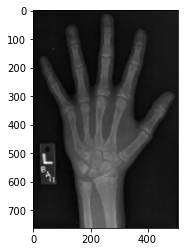

In [55]:
c = 8#im.min()    #Pin = im
d = 150#im.max()
a = 0
b = 255

stretched_image = (im - c) * ((b - a) / (d - c)) + a

#-------Untuk membenarkan clipping---#
stretched_image = stretched_image/np.amax(stretched_image)  #
stretched_image = np.clip(stretched_image, 0, 1)  #

plt.imshow(stretched_image)
plt.show()

### Image Negatives (Inverted Image)

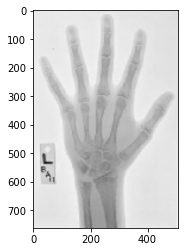

In [56]:
img_inv = 255 - im
plt.imshow(img_inv)
plt.show()